In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np


In [2]:
sns.set()

In [17]:
# load iris dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [24]:
vericolor_pl_indices = np.where(y == 1)
versicolor_pl = x[vericolor_pl_indices]

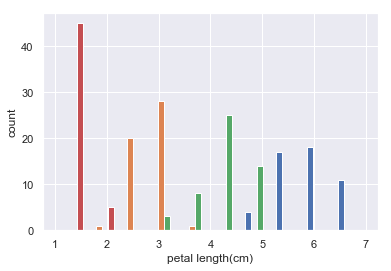

In [29]:
plt.hist(versicolor_pl)
plt.xlabel('petal length(cm)')
plt.ylabel('count')
plt.show()

### Use `bins` to plot the histogram

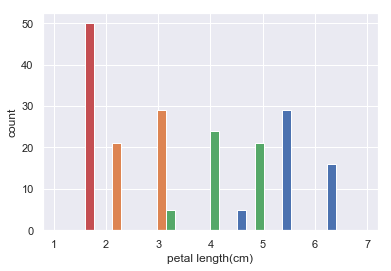

In [34]:
len_data = len(versicolor_pl)
n_bins = np.sqrt(len_data)
n_bins = int(n_bins)
plt.hist(versicolor_pl, bins=n_bins)
plt.xlabel('petal length(cm)')
plt.ylabel('count')
plt.show()

### Bee swarm plot
- Make a bee swarm plot of the iris petal lengths. x-axis should contain each of the three species, and the y-axis the petal lengths.
- The x-axis should contain each of the three species, and the y-axis should contain the petal lengths.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()

iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


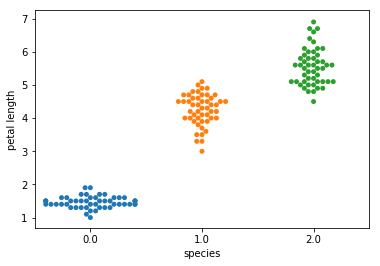

In [9]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='target', y="petal length (cm)", data=iris_df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length')
# Show the plot

plt.show()

### Computing the ECDF
- write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. 

In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y


### Plotting the ECDF
- use your ecdf() function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. We will then plot the ECDF. 

In [5]:
print(set(iris_df.target))
versicolor_petal_length = iris_df.loc[iris_df['target'] == 1.0]['petal length (cm)']
versicolor_petal_width = iris_df.loc[iris_df['target'] == 1.0]['petal width (cm)']
setosa_petal_length = iris_df.loc[iris_df['target'] == 0.0]['petal length (cm)']
virginica_petal_length = iris_df.loc[iris_df['target'] == 2.0]['petal length (cm)']
versicolor_petal_length.head()

{0.0, 1.0, 2.0}


50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: petal length (cm), dtype: float64

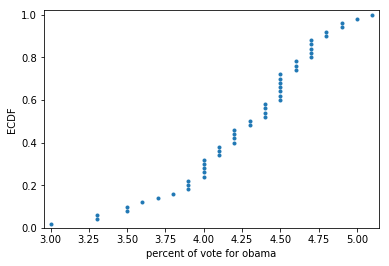

In [19]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker=".", linestyle='none')


# Label the axes
_ = plt.xlabel('percent of vote for obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # keeps data off plot edges


# Display the plot
plt.show()


### Comparison of ECDFs
- ECDFs also allow us to compare two or more distributions (though plots get cluttered if you have too many).
- **Task** : plot ECDFs for the petal lengths of all three iris species. 
- To overlay all three ECDFs on the same plot, we can use plt.plot() three times, once for each ECDF.

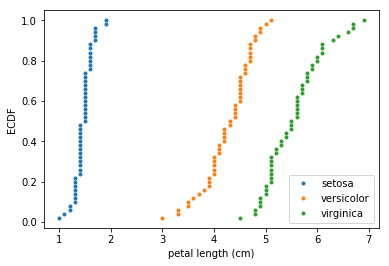

In [22]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker=".", linestyle='none')
_ = plt.plot(x_vers, y_vers, marker=".", linestyle='none')
_ = plt.plot(x_virg, y_virg, marker=".", linestyle='none')


# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

- **Conclusion** : The ECDFs expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

### Computing percentiles

In [23]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


### Comparing percentiles to ECDF
- To see how the percentiles relate to the ECDF, we will plot the percentiles of Iris versicolor petal lengths
- to ensure the Y-axis of the ECDF plot remains between 0 and 1, we will **need to rescale the percentiles array accordingly - in this case, dividing it by 100.**

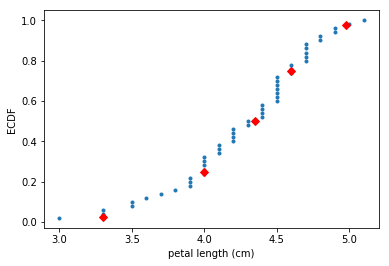

In [24]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


### Box-and-whisker plot
- Make a box plot of the iris petal lengths

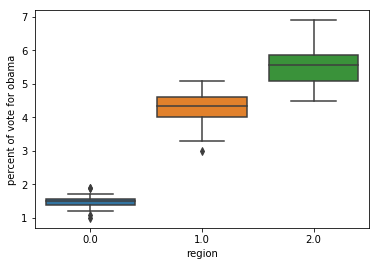

In [27]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='target', y='petal length (cm)', data=iris_df)

# Label the axes
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for obama')

# Show the plot
plt.show()


### Scatter plot
- scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers

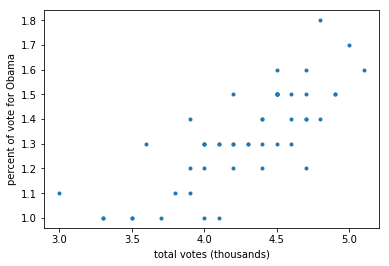

In [6]:
# Make a scatter plot

_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')

# Show the result
plt.show()

### Computing the covariance
- The covariance may be computed using the Numpy function `np.cov()`. For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array **where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data** in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

In [7]:
# Compute the covariance matrix: covariance_matrix

covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0][1]

# Print the length/width covariance
print(petal_cov)


[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


### Computing the Pearson correlation coefficient
- Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the `np.corrcoef(` function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. **Entries [0,0] and [1,1] are necessarily equal to 1 , and the value we are after is entry [0,1].**
- write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient.

In [8]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length,  versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169
